In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import random

2022-11-29 23:28:28.815668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 23:28:28.887525: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 23:28:28.887537: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 23:28:29.300646: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [3]:
# read in the data
data = pd.read_csv("shm_data.csv")
length_training = data.loc[:, "Length"].to_numpy()
print(length_training.shape)
period_training = data.loc[:, "Period"].to_numpy()

(190,)


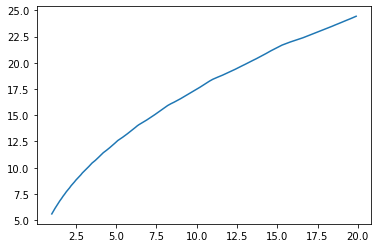

In [4]:
# curious to see how a plot of this looks
plt.plot(length_training, period_training)
# ok... something has gone wrong with the dataset
# we can fix that later
# let's build the model while we're here

In [10]:
# build the model
tf.random.set_seed(71)

model = tf.keras.Sequential([tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(64, activation="relu"),
tf.keras.layers.Dense(32, activation="relu"),
tf.keras.layers.Dense(16, activation="relu"),
tf.keras.layers.Dense(8, activation="relu"),
tf.keras.layers.Dense(1, activation="linear")
])
model.compile(loss = tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])

class haltCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss') <= 10):
            self.model.stop_training = True

stopCallback = haltCallback()

model.fit(tf.expand_dims(length_training, axis=1), tf.expand_dims(period_training, axis=1), epochs=1000)

Epoch 1/1000
6/6 [==============================] - 0s 1ms/step - loss: 17.1556 - mae: 17.1556
Epoch 2/1000
6/6 [==============================] - 0s 675us/step - loss: 17.0285 - mae: 17.0285
Epoch 3/1000
6/6 [==============================] - 0s 743us/step - loss: 16.2353 - mae: 16.2353
Epoch 4/1000
6/6 [==============================] - 0s 770us/step - loss: 10.6137 - mae: 10.6137
Epoch 5/1000
6/6 [==============================] - 0s 811us/step - loss: 7.8232 - mae: 7.8232
Epoch 6/1000
6/6 [==============================] - 0s 742us/step - loss: 6.7299 - mae: 6.7299
Epoch 7/1000
6/6 [==============================] - 0s 795us/step - loss: 5.4445 - mae: 5.4445
Epoch 8/1000
6/6 [==============================] - 0s 812us/step - loss: 7.6931 - mae: 7.6931
Epoch 9/1000
6/6 [==============================] - 0s 715us/step - loss: 5.8000 - mae: 5.8000
Epoch 10/1000
6/6 [==============================] - 0s 782us/step - loss: 6.6036 - mae: 6.6036
Epoch 11/1000
6/6 [========================

In [11]:
# let's see how the model does
print(model.predict([0.1]))
print((model.predict([900])))

1/1 [==============================] - 0s 45ms/step
[[4.1149826]]
1/1 [==============================] - 0s 48ms/step
[[221.37947]]


1/1 [==============================] - 0s 17ms/step


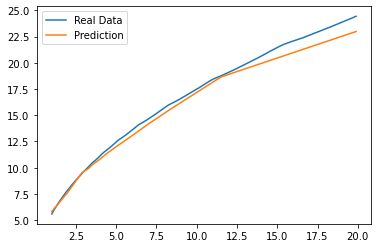

In [9]:
plt.plot(length_training, period_training, label="Real Data")
period_predictions = []
for k in length_training:
    period_predictions.append(model.predict([k])[0][0])

plt.plot(length_training, period_predictions, label="Prediction")
plt.legend()